## KERAS LSTM + MLP 

In this notebook we aim to create an MLP neural network and a LSTM Neural Network using the Keras Sequential Model. We will use the Stock KME to perform our analysis. 

In [27]:
import math

In [1]:
import sqlite3
import glob
import pandas as pd
%matplotlib inline
import seaborn as sns
from helpers_funcs.sql_funcs import fetch_mquote
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Grabbing data from the SQLite Database. 
datas_conn = sqlite3.connect('stocks_data.db')
datas_c = datas_conn.cursor()
datas_c.execute("SELECT name FROM sqlite_master WHERE type='table';")
current_list = (datas_c.fetchall())

In [2]:
def dates_df_fromdf(symbol_df):
    #Generates a Series of the dates and timestamps which correspond to
    # Midquote values.
    dates= pd.Series(symbol_df['DATE'])
    dates = pd.to_timedelta(dates, unit='D') + pd.Timestamp('1960-1-1')
    for x in range(len(dates)):
        dates[x]=pd.Timestamp(str(dates[x])[:11]+(symbol_df['itime'][x]))
        
    return dates


In [6]:
df_KME = pd.read_sql_query('select * from "{}"'.format('KME'), datas_conn)
#Generate a df for stock data

In [9]:
df_KME.head(n=5)

,PERMNO,SYMBOL,DATE,itime,mquote
0,88486.0,KME,14843.0,09:30:00,5.59375
1,88486.0,KME,14843.0,09:31:00,5.59375
2,88486.0,KME,14843.0,09:32:00,5.59375
3,88486.0,KME,14843.0,09:33:00,5.59375
4,88486.0,KME,14843.0,09:34:00,5.59375


In [15]:
KME_dates = dates_df_fromdf(df_KME)

df_KME['mquote']=pd.to_numeric(df_KME['mquote'])

df_KME['DATE']=pd.to_numeric(df_KME['DATE'])

#Modification to take care of graphing error. 

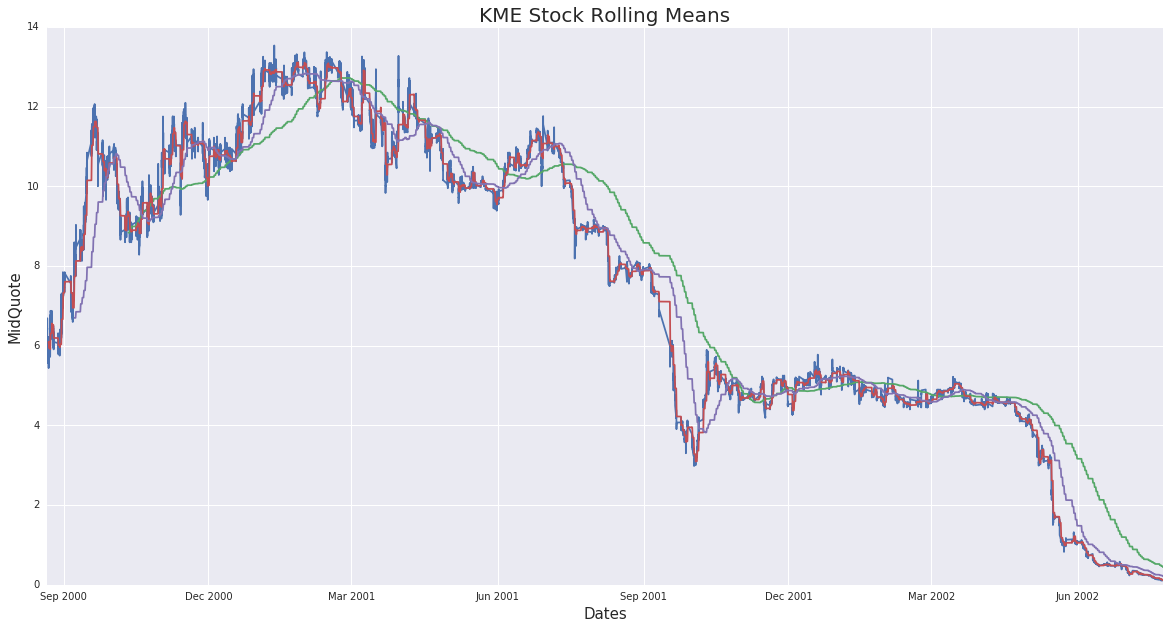

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(KME_dates,pd.to_numeric(df_KME['mquote']))
ax.plot(KME_dates,df_KME['mquote'].rolling(center=False,window=14467).mean().values)
ax.plot(KME_dates,df_KME['mquote'].rolling(center=False,window=481).mean().values)
ax.plot(KME_dates,df_KME['mquote'].rolling(center=False,window=5083).mean().values)

ax.set_title('KME Stock Rolling Means',size = 20)
ax.set_xlabel('Dates',size=15)
ax.set_ylabel('MidQuote',size=15)


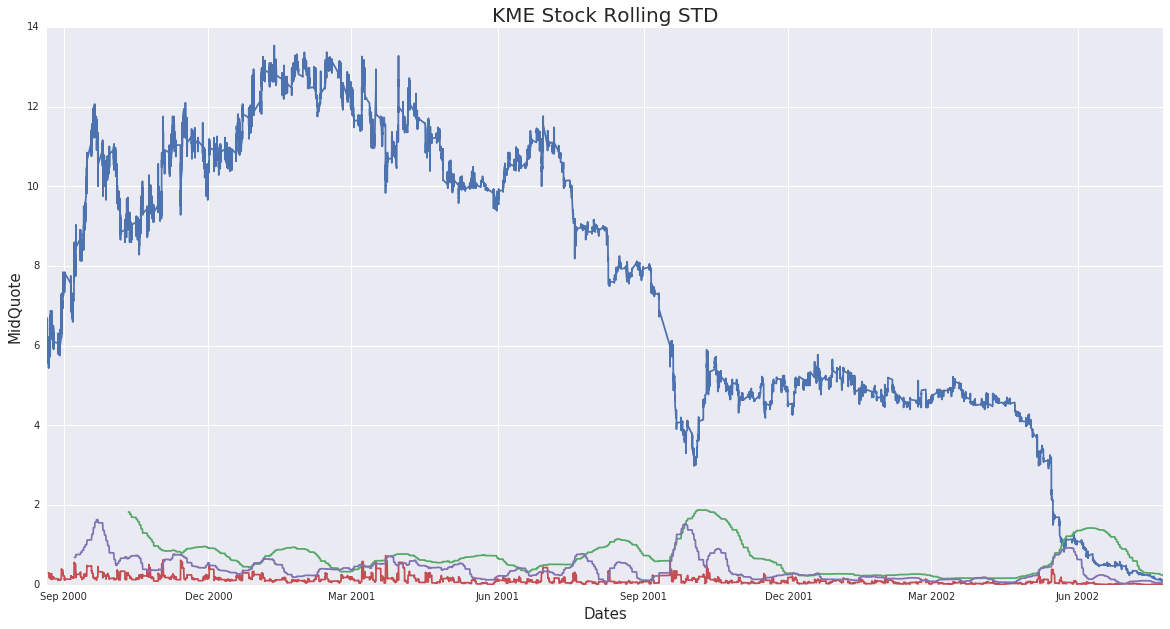

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(KME_dates,pd.to_numeric(df_KME['mquote']))
ax.plot(KME_dates,df_KME['mquote'].rolling(center=False,window=14467).std().values)
ax.plot(KME_dates,df_KME['mquote'].rolling(center=False,window=481).std().values)
ax.plot(KME_dates,df_KME['mquote'].rolling(center=False,window=5083).std().values)

ax.set_title('KME Stock Rolling STD',size = 20)
ax.set_xlabel('Dates',size=15)
ax.set_ylabel('MidQuote',size=15)

Finding the rolling means by Day, Week and Month to observe specific tredns in the data given over specific time intervals. Useful to observe whether the general trend of the stock in the market is increasing or deacreasing. 

Rolling STD lets us the variation of the values over the two years.  

## Keras MLP

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.recurrent import LSTM


Using Theano backend.


In [46]:
#Function to seperate data set into training and testing
#The set value for look back in time is 5 minutes
#Function Parameters: stock_data values and look_back: time to look back
def create_training_set(stock_data, look_back=5):
    dataX, dataY = [], []
    for i in range(len(stock_data)-look_back-1):
        temp_val = stock_data[i:(i+look_back)]
        dataX.append(temp_val)
        dataY.append(stock_data[i + look_back])
    return np.array(dataX), np.array(dataY)
 

In [38]:
# We are going to split the data into 65% testing and 35% training
train_size=math.floor(len(df_KME['mquote'].values)*.65)
test_size = len(df_KME['mquote'].values)-train_size

In [43]:
#breaking down the datasets
train_values_MLP = df_KME['mquote'].values[0:train_size]
test_values_MLP = df_KME['mquote'].values[train_size:train_size+test_size]

In [50]:
#Calling create dataset
train_set_MLPX,train_set_MLPY = create_training_set(train_values_MLP,10)
test_set_MLPX,test_setMLPY = create_training_set(test_values_MLP,10)

In [42]:
#MLP Model 
model_MLP_KME = Sequential()

In [53]:
#Adding layers to the MLP 
model_MLP_KME.add(Dense(8, input_dim=10, activation='relu'))
model_MLP_KME.add(Dense(1))
model_MLP_KME.compile(loss='mean_squared_error', optimizer='adam')
model_MLP_KME.fit(train_set_MLPX, train_set_MLPY, nb_epoch=20, batch_size=5, verbose=2)

Epoch 1/20
10s - loss: 0.0262
Epoch 2/20
10s - loss: 0.0072
Epoch 3/20
9s - loss: 0.0061
Epoch 4/20
10s - loss: 0.0055
Epoch 5/20
10s - loss: 0.0051
Epoch 6/20
10s - loss: 0.0049
Epoch 7/20
10s - loss: 0.0047
Epoch 8/20
10s - loss: 0.0046
Epoch 9/20
10s - loss: 0.0044
Epoch 10/20
10s - loss: 0.0044
Epoch 11/20
10s - loss: 0.0043
Epoch 12/20
9s - loss: 0.0043
Epoch 13/20
9s - loss: 0.0042
Epoch 14/20
10s - loss: 0.0042
Epoch 15/20
9s - loss: 0.0041
Epoch 16/20
10s - loss: 0.0041
Epoch 17/20
10s - loss: 0.0041
Epoch 18/20
10s - loss: 0.0040
Epoch 19/20
10s - loss: 0.0040
Epoch 20/20
10s - loss: 0.0040


In [54]:
#Next step is evaluation
train_MLP_evaluation  = model_MLP_KME.evaluate(train_set_MLPX,train_set_MLPY,batch_size=5,verbose=0)
test_MLP_evaluation = model_MLP_KME.evaluate(test_set_MLPX,test_setMLPY,batch_size=5,verbose=0)

In [55]:
#Printing out evaluation scores. 
#Output is the scalar test loss. 
print(train_MLP_evaluation,test_MLP_evaluation)

0.00311859643061 0.000833603070939


In [56]:
train_MLP_predict = model_MLP_KME.predict(train_set_MLPX)
test_MLP_predict = model_MLP_KME.predict(test_set_MLPX)

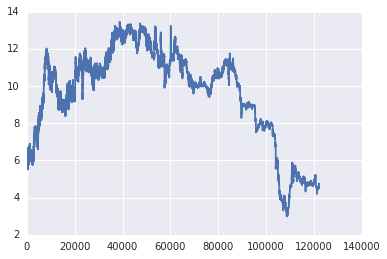

In [70]:
plt.plot(train_MLP_predict)
#plt.plot(df_KME['mquote'].values)

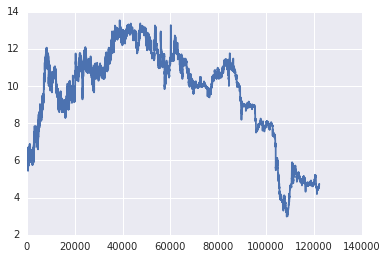

In [72]:
plt.plot(df_KME['mquote'].values[0:len(train_MLP_predict)])

In [74]:
df_KME['mquote'].values[0:len(train_MLP_predict)]==np.reshape(train_MLP_predict,train_MLP_predict.shape[0])

array([False, False, False, ..., False, False, False], dtype=bool)